In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [5]:
%matplotlib inline

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [9]:
movies=pd.read_csv("Movies.csv")

In [23]:
movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
87580,292731,The Monroy Affaire (2022),Drama
87581,292737,Shelter in Solitude (2023),Comedy|Drama
87582,292753,Orca (2023),Drama
87583,292755,The Angry Breed (1968),Drama


In [30]:
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [33]:
movies.tail()

,movieId,title,genres
87580,292731,The Monroy Affaire (2022),Drama
87581,292737,Shelter in Solitude (2023),Comedy|Drama
87582,292753,Orca (2023),Drama
87583,292755,The Angry Breed (1968),Drama
87584,292757,Race to the Summit (2023),Action|Adventure|Documentary


In [35]:
ratings=pd.read_csv("ratings.csv")

In [37]:
tags=pd.read_csv("tags.csv")

In [39]:
ratings


,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858
...,...,...,...,...
32000199,200948,79702,4.5,1294412589
32000200,200948,79796,1.0,1287216292
32000201,200948,80350,0.5,1294412671
32000202,200948,80463,3.5,1350423800


In [41]:
tags

,userId,movieId,tag,timestamp
0,22,26479,Kevin Kline,1583038886
1,22,79592,misogyny,1581476297
2,22,247150,acrophobia,1622483469
3,34,2174,music,1249808064
4,34,2174,weird,1249808102
...,...,...,...,...
2000067,162279,90645,Rafe Spall,1320817734
2000068,162279,91079,Anton Yelchin,1322337407
2000069,162279,91079,Felicity Jones,1322337400
2000070,162279,91658,Rooney Mara,1325828398


In [43]:
tags.head()


,userId,movieId,tag,timestamp
0,22,26479,Kevin Kline,1583038886
1,22,79592,misogyny,1581476297
2,22,247150,acrophobia,1622483469
3,34,2174,music,1249808064
4,34,2174,weird,1249808102


In [45]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [47]:
#add column names

movies.columns=["movie_Id","movie_name","category"]
movies.dropna(inplace=True)
movies.head()

,movie_Id,movie_name,category
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [49]:
#rename column
ratings.columns=["Id","Movie_Id","Ratings","Time_Stamp"]
ratings.dropna(inplace=True)
ratings.head()

,Id,Movie_Id,Ratings,Time_Stamp
0,1,17,4.0,944249077
1,1,25,1.0,944250228
2,1,29,2.0,943230976
3,1,30,5.0,944249077
4,1,32,5.0,943228858


In [51]:
df=pd.concat([movies,ratings,tags],axis=1)
df.head()

,movie_Id,movie_name,category,Id,Movie_Id,Ratings,Time_Stamp,userId,movieId,tag,timestamp
0,1.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,17,4.0,944249077,22.0,26479.0,Kevin Kline,1.583039e+09
1,2.0,Jumanji (1995),Adventure|Children|Fantasy,1,25,1.0,944250228,22.0,79592.0,misogyny,1.581476e+09
2,3.0,Grumpier Old Men (1995),Comedy|Romance,1,29,2.0,943230976,22.0,247150.0,acrophobia,1.622483e+09
3,4.0,Waiting to Exhale (1995),Comedy|Drama|Romance,1,30,5.0,944249077,34.0,2174.0,music,1.249808e+09
4,5.0,Father of the Bride Part II (1995),Comedy,1,32,5.0,943228858,34.0,2174.0,weird,1.249808e+09


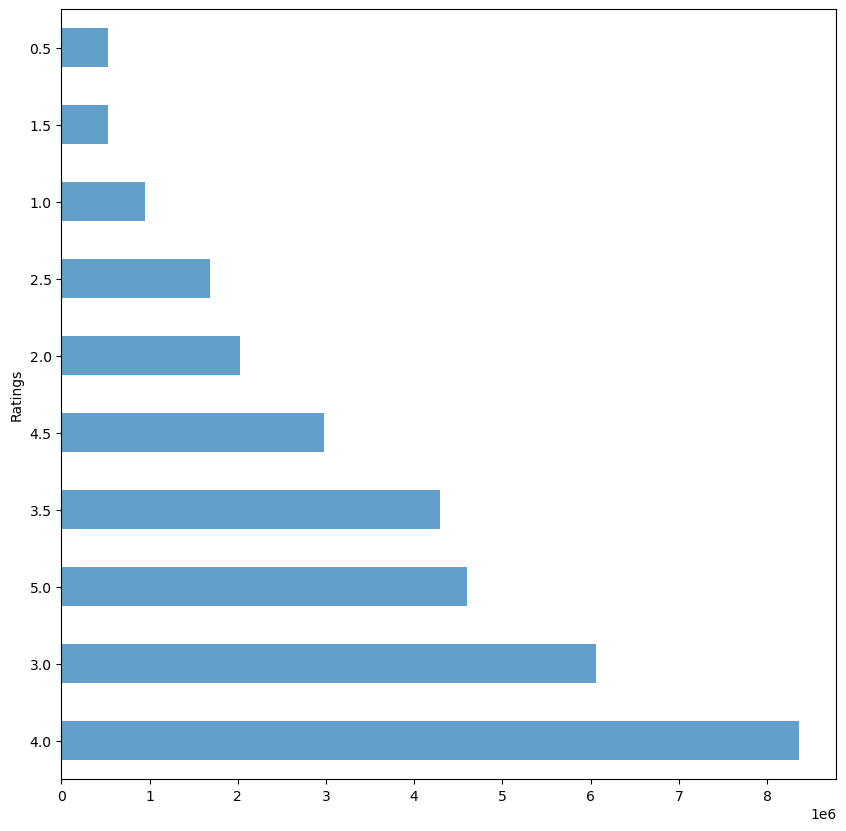

In [32]:
df["Ratings"].value_counts().plot(kind="barh",alpha=0.7,figsize=(10,10))
plt.show()

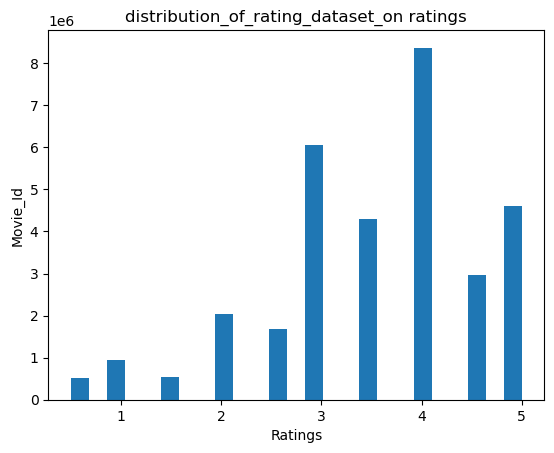

In [33]:
df.Ratings.plot.hist(bins=25)
plt.title("distribution_of_rating_dataset_on ratings")
plt.ylabel("Movie_Id")
plt.xlabel("Ratings")
plt.show()

over all ratings by user


In [37]:
#grouping
groupedby_movie_name=df.groupby("movie_name")
groupedby_Ratings=df.groupby("Ratings")
groupby_userId=df.groupby("userId")


In [39]:
moviess=df.groupby("movie_name").size().sort_values(ascending=True)[:1000]
print(moviess)

movie_name
 (2019)                                   1
Rudy Habibie (2016)                       1
Rudy (1993)                               1
Rudraksh (2004)                           1
Rudolph, the Red-Nosed Reindeer (1964)    1
                                         ..
Riot in Cell Block 11 (1954)              1
Riot On! (2004)                           1
Ripples (1967)                            1
Riptide (1934)                            1
Riptide (1949)                            1
Length: 1000, dtype: int64


In [41]:
x=groupedby_movie_name.get_group('Rudy (1993)')
x.shape

(1, 11)

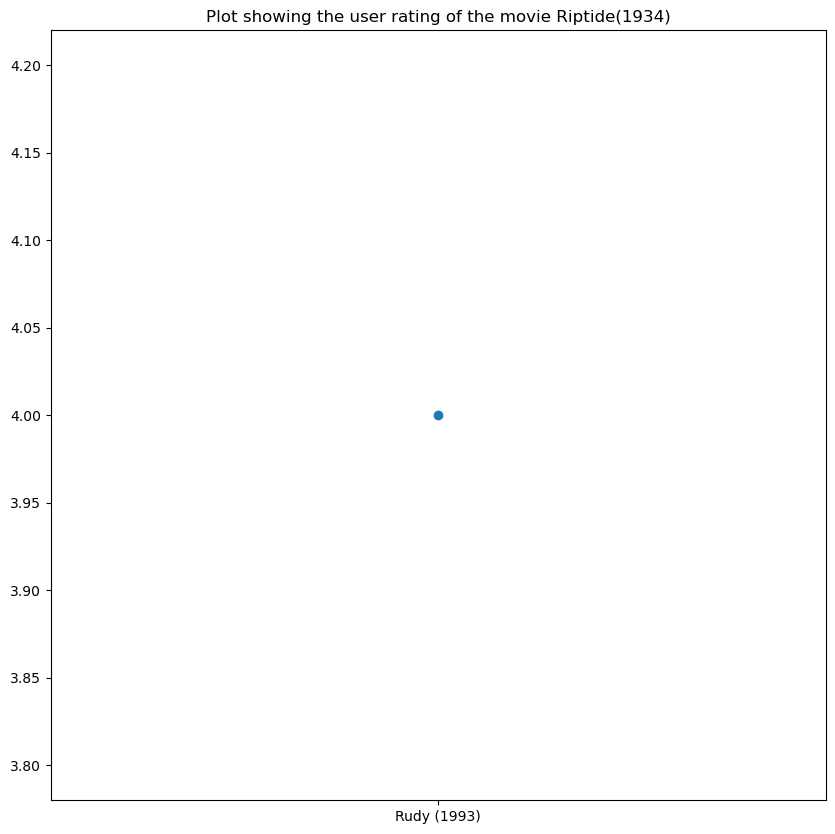

In [43]:
#find nad visulize the user rating of the movie Riptide(1934)
plt.figure(figsize=(10,10))
plt.scatter(x["movie_name"],x["Ratings"])
plt.title("Plot showing the user rating of the movie Riptide(1934)")
plt.show()

In [45]:
movies

,movie_Id,movie_name,category
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
87580,292731,The Monroy Affaire (2022),Drama
87581,292737,Shelter in Solitude (2023),Comedy|Drama
87582,292753,Orca (2023),Drama
87583,292755,The Angry Breed (1968),Drama


In [47]:
movies.head(50)

,movie_Id,movie_name,category
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [49]:
movie_name="Riptide(1934)"
res=movies[movies["movie_name"].str.contains(movie_name,case=False,na=False)]
print(res)


Empty DataFrame
Columns: [movie_Id, movie_name, category]
Index: []


C:\Users\thaku\AppData\Local\Temp\ipykernel_8684\2369930781.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  res=movies[movies["movie_name"].str.contains(movie_name,case=False,na=False)]


In [51]:
movies.head()

,movie_Id,movie_name,category
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [53]:
movies

,movie_Id,movie_name,category
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
87580,292731,The Monroy Affaire (2022),Drama
87581,292737,Shelter in Solitude (2023),Comedy|Drama
87582,292753,Orca (2023),Drama
87583,292755,The Angry Breed (1968),Drama


In [55]:
movies

,movie_Id,movie_name,category
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
87580,292731,The Monroy Affaire (2022),Drama
87581,292737,Shelter in Solitude (2023),Comedy|Drama
87582,292753,Orca (2023),Drama
87583,292755,The Angry Breed (1968),Drama


In [57]:
# visualize the rating data by tags of userId = 22.0
user_Id22=groupby_userId.get_group(22)
user_Id22[["userId","Ratings"]]


,userId,Ratings
0,22.0,4.0
1,22.0,1.0
2,22.0,2.0


preform machine learning on first 500 extracted records

In [60]:
first_500=df[500:]
first_500.dropna(inplace=True)

C:\Users\thaku\AppData\Local\Temp\ipykernel_8684\1061955935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  first_500.dropna(inplace=True)


In [61]:
features=first_500[["movie_Id","userId","movie_name"]].values

In [62]:
lables=first_500[["Ratings"]].values

In [63]:
#build train and test dataset
train,test,train_labels,test_lables=train_test_split(features,lables,test_size=0.33,random_state=42)

perform the following 

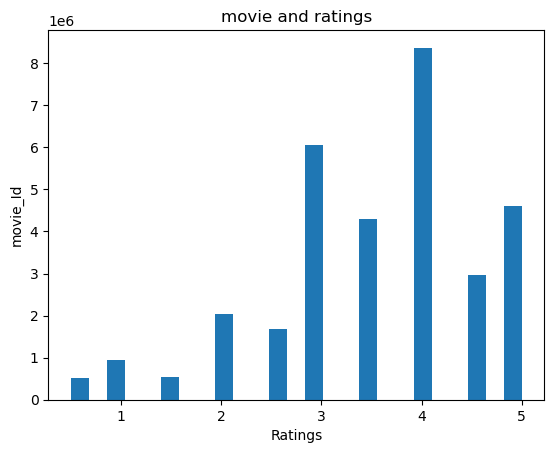

In [69]:
# make a histogarm for movies
df.Ratings.plot.hist(bins=25)
plt.title("movie and ratings")
plt.ylabel("movie_Id")
plt.xlabel("Ratings")
plt.show()

In [70]:
print(train.shape)
print(train_labels.shape)

(58346, 3)
(58346, 1)


In [71]:
print(train)

[[256831.0 10767.0 'Gary Numan: Android In La La Land (2016)']
 [150786.0 5579.0 'Dark Country (2009)']
 [282749.0 11406.0 'Soup for One (1982)']
 ...
 [257409.0 10790.0 'My Family Treasure (1995)']
 [1396.0 457.0 'Sneakers (1992)']
 [86244.0 2818.0 'Easy Money (Snabba Cash) (2010)']]


In [75]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [77]:
tags.head()

,userId,movieId,tag,timestamp
0,22,26479,Kevin Kline,1583038886
1,22,79592,misogyny,1581476297
2,22,247150,acrophobia,1622483469
3,34,2174,music,1249808064
4,34,2174,weird,1249808102


In [79]:
# Let's say we want to predict the userId based on tag text
tags = tags.dropna()

# Convert text tags to numeric using LabelEncoder or TF-IDF
le = LabelEncoder()
X = le.fit_transform(tags['tag'])  # categorical conversion of tags

# You must reshape X if it's a single feature
X = X.reshape(-1, 1)

y = tags['userId']  # label

# Split dataset
train, test, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)


In [80]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Sample (incorrect) training data
train = pd.DataFrame({'feature1': [1, 2, 3, 4],
                      'description': ['text1', 'text2', 'Gary Numan: Android In La La Land (2016)', 'text4'],
                      'feature2': [5.0, 6.0, 7.0, 8.0]})
train_labels = pd.Series([0, 1, 0, 1])

# Sample test data
test = pd.DataFrame({'feature1': [5, 6],
                     'description': ['new text1', 'new text2'],
                     'feature2': [9.0, 10.0]})

# Identify object (string) columns
object_cols_train = [col for col in train.columns if train[col].dtype == 'object']
print("Object columns in training data:", object_cols_train)

# If 'description' is not meant to be a feature, remove it
if 'description' in train.columns:
    train = train.drop('description', axis=1)
    test = test.drop('description', axis=1)
    print("\n'description' column removed.")

# Now, assuming the remaining features are numerical:
logreg = LogisticRegression()
logreg.fit(train, train_labels)
y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
print("Accuracy:", acc_log)
print("Predictions:", y_pred)

Object columns in training data: ['description']

'description' column removed.
Accuracy: 50.0
Predictions: [1 1]


In [87]:
#support vector machine 
svc=SVC()
svc.fit(train,train_labels)
y_pred=svc.predict(test)
acc_svc=round(svc.score(train,train_labels)*100,2)
acc_svc

50.0

In [91]:
#knearest neighbours classifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(train,train_labels)
y_pred=knn.predict(test)
acc_knn=round(knn.score(train,train_labels)*100,2)
acc_knn


50.0

In [95]:
#gaussian naive bayes
gaussian = GaussianNB()
gaussian.fit(train,train_labels)
gaussian_pred=gaussian.predict(test)
acc_gaussian=round(gaussian.score(train,train_labels)*100,2)
acc_gaussian

50.0

In [99]:
#preceptron


perceptron= Perceptron()
perceptron.fit(train,train_labels)
y_pred=perceptron.predict(test)
acc_perceptron=round(perceptron.score(train,train_labels)*100,2)
acc_perceptron

50.0

In [101]:
#linear svc
linear_svc= LinearSVC()
linear_svc.fit(train,train_labels)
y_pred=linear_svc.predict(test)
acc_linear_svc=round(linear_svc.score(train,train_labels)*100,2)
acc_linear_svc


50.0

In [103]:
#stochastic gradient decent (sgd)
sgd=SGDClassifier()
sgd.fit(train,train_labels)
y_pred=sgd.predict(test)
acc_sgd=round(sgd.score(train,train_labels)*100,2)
acc_sgd



50.0

In [105]:
#decision tree
dec_tree=DecisionTreeClassifier()
dec_tree.fit(train,train_labels)
y_pred=dec_tree.predict(test)
acc_dec_tree=round(dec_tree.score(train,train_labels)*100,2)
acc_dec_tree


100.0

In [107]:
#random forest
rnd_forest=RandomForestClassifier()
rnd_forest.fit(train,train_labels)
y_pred=rnd_forest.predict(test)
acc_rnd_forest=round(rnd_forest.score(train,train_labels)*100,2)
acc_rnd_forest



100.0

In [141]:
#print all score of all models 
8.5
models=pd.DataFrame({"model":["supportvectormachine","knn","logisticregression","randomforest","naivebayes","perceptron","stocharsticgradientdecent","linearsvc","decisiontree"],"score":[acc_svc,acc_rnd_forest,acc_dec_tree,acc_sgd,acc_linear_svc,acc_perceptron,acc_gaussian,acc_knn,acc_log]})
models.sort_values(by="score",ascending=False)

,model,score
1,knn,100.0
2,logisticregression,100.0
0,supportvectormachine,50.0
3,randomforest,50.0
4,naivebayes,50.0
5,perceptron,50.0
6,stocharsticgradientdecent,50.0
7,linearsvc,50.0
8,decisiontree,50.0


In [1]:
import pandas as pd

# Creating the DataFrame
models = pd.DataFrame({
    "model": [
        "supportvectormachine",
        "randomforest",
        "decisiontree",
        "stochasticgradientdescent",
        "linearsvc",
        "perceptron",
        "naivebayes",
        "knn",
        "logisticregression"
    ],
    "score": [
        acc_svc,acc_rnd_forest,acc_dec_tree,acc_sgd,acc_linear_svc,acc_perceptron,acc_gaussian,acc_knn,acc_log
    ]
})

# Sorting and displaying the models by score
models_sorted = models.sort_values(by="score", ascending=False)
models_sorted


NameError: name 'acc_svc' is not defined